In [35]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import json
import pandas as pd
import seaborn as sns

In [36]:
file = open("./dataset/glassdoor_reviews.json", 'r', encoding='utf8')
dataset_dict = json.load(file)

In [37]:
print("Dataset Size: %d" % (len(dataset_dict)))
print(f"Sample Item: {dataset_dict[0]}")

Dataset Size: 838566
Sample Item: {'firm': 'AFH-Wealth-Management', 'date_review': '2015-04-05', 'job_title': ' ', 'current': 'Current Employee', 'location': '', 'overall_rating': 2, 'work_life_balance': 4.0, 'culture_values': 3.0, 'diversity_inclusion': '', 'career_opp': 2.0, 'comp_benefits': 3.0, 'senior_mgmt': 3.0, 'recommend': 'x', 'ceo_approv': 'o', 'outlook': 'r', 'headline': 'Young colleagues, poor micro management', 'pros': 'Very friendly and welcoming to new staff. Easy going ethic.', 'cons': 'Poor salaries, poor training and communication.'}


In [38]:
dataset = pd.DataFrame.from_dict(dataset_dict, orient='columns')

In [39]:
dataset.head(10)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,,2,4.0,3.0,,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,,5,2.0,3.0,,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
5,AFH-Wealth-Management,2016-05-26,Office Administrator,"Current Employee, less than 1 year",,3,4.0,2.0,,2.0,3.0,2.0,o,r,r,Office administrator,Some good people to work with. Flexible worki...,Morale. Lack of managerial structure. Doesn'...
6,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,,1.0,1.0,1.0,x,o,r,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...
7,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,,5.0,4.0,5.0,v,o,v,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...
8,AFH-Wealth-Management,2016-11-03,Anonymous Employee,"Former Employee, more than 1 year",,4,4.0,4.0,,4.0,4.0,4.0,v,o,v,I liked working for AFH,"Nice Staff, good HR Team. Feels vibrant and fo...",Can't really think of any obvious cons
9,AFH-Wealth-Management,2017-02-21,Technician,"Former Employee, more than 3 years","Santa Ana, CA",1,1.0,1.0,,1.0,3.0,1.0,x,x,x,Honest Review,Made some life time friends.,Was let go from the company just before Christ...


In [40]:
dataset['firm'].unique()

array(['AFH-Wealth-Management', 'AJ-Bell', 'ALDI', 'AQA', 'ASDA', 'ASOS',
       'AXA-UK', 'Abcam',
       'Abertawe-Bro-Morgannwg-University-Health-Board', 'Accenture',
       'Accor', 'Achieving-for-Children', 'ActionCOACH',
       'Active-Care-Group', 'Adecco', 'Age-UK-The-National-Charity',
       'AlixPartners', 'American-Express', 'Amey', 'Angard-Staffing',
       'Anglian-Water', 'Anglo-American',
       'Animal-and-Plant-Health-Agency', 'Aon', 'Apple', 'Arcadia',
       'Arnold-Clark', 'AstraZeneca', 'Aviva', 'B-and-M-Retail',
       'B-and-Q', 'BAT', 'BBC', 'BDO', 'BHS', 'BIS', 'BNP-Paribas',
       'BNY-Mellon', 'BP', 'BPP-Holdings', 'BT',
       'Babcock-International-Group', 'Babylon-Health',
       'Bain-and-Company', 'Balfour-Beatty', 'Bannatyne-Group',
       'Barchester-Healthcare', 'Barclays', 'Barnardo-s',
       'Barnet-and-Chase-Farm-Hospitals-NHS-Trust', 'Barnett-Waddingham',
       'Barratt-Developments', 'Barts-Health-NHS-Trust',
       'BayWa-r-e-renewable-energ

In [41]:
np_len = np.vectorize(len)
firm_name_len = np_len(dataset['firm'])

In [42]:
max(firm_name_len), min(firm_name_len)

(50, 2)

In [43]:
#printing longest and shortest firm names
dataset['firm'][np.where(firm_name_len == max(firm_name_len))[0][0]], dataset['firm'][np.where(firm_name_len == min(firm_name_len))[0][0]]

('Engineering-and-Physical-Sciences-Research-Council', 'BP')

In [44]:
#number of reviews per company
dataset['firm'].value_counts()

firm
IBM                         60436
McDonald-s                  49450
Deloitte                    46995
EY                          34050
PwC                         33227
                            ...  
i-Net-Solution                  4
Health-Protection-Agency        4
The-Survey-Association          3
NPSA                            2
UKCIL                           1
Name: count, Length: 428, dtype: int64

In [45]:
#earliest and latest review dates
min(dataset['date_review']), max(dataset['date_review'])

('2008-01-31', '2021-06-08')

In [46]:
#all dates are length 10
(np_len(dataset['date_review']) != 10).sum()

0

In [47]:
#number of reviews per year
review_years = dataset['date_review'].str.slice(0, 4)
review_years.value_counts()

date_review
2021    144578
2020    140310
2019    103288
2017     91333
2018     87954
2016     84427
2015     69241
2014     39505
2013     24696
2012     20587
2011     10886
2010     10110
2009      5958
2008      5693
Name: count, dtype: int64

In [48]:
# dataset is the pd frame
# Missing data

count_missing_diversity = (dataset['diversity_inclusion'] == '').sum()
print(f"Number of empty string values in 'diversity_inclusion': {count_missing_diversity}")

# Proportion of the missing data comparing to the number of total observations
propotion_empty_diversity = count_missing_diversity / len(dataset)
print(f"Proportion of empty string values in 'column_name': {propotion_empty_diversity}")

Number of empty string values in 'diversity_inclusion': 702500
Proportion of empty string values in 'column_name': 0.8377396650949359


In [49]:

columns_to_check = ["work_life_balance", "culture_values", "career_opp", "comp_benefits", "senior_mgmt"]

total_observations = len(dataset)
missing_proportions = {}

for column in columns_to_check:
    # Count the number of null/missing values in the column
    missing_count = (dataset[column] == '').sum()
    
    # Calculate the proportion of missing values
    proportion_missing = missing_count / total_observations
    
    # Store the proportion in the dictionary
    missing_proportions[column] = proportion_missing

# Display the proportion of missing values for each column
missing_proportions


{'work_life_balance': 0.17875039054767305,
 'culture_values': 0.22821459491560592,
 'career_opp': 0.17589670938244575,
 'comp_benefits': 0.17897458279968423,
 'senior_mgmt': 0.18588399720475193}

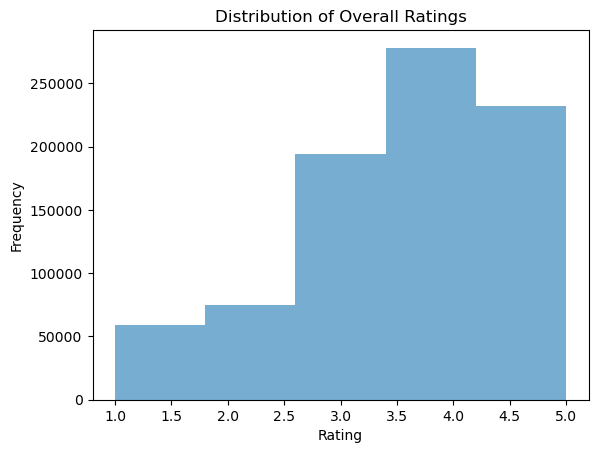

In [50]:
# Rating analysis

dataset['overall_rating'].plot.hist(bins=5, alpha=0.6)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [51]:
# Average rating per category
# print(dataset.dtypes)

categories = ['work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']

for category in categories:
    dataset[category] = pd.to_numeric(dataset[category], errors='coerce')

avg_ratings = dataset[categories].mean()

print(avg_ratings)
print(dataset.dtypes)


work_life_balance    3.375735
culture_values       3.590164
career_opp           3.461825
comp_benefits        3.398109
senior_mgmt          3.176576
dtype: float64
firm                    object
date_review             object
job_title               object
current                 object
location                object
overall_rating           int64
work_life_balance      float64
culture_values         float64
diversity_inclusion     object
career_opp             float64
comp_benefits          float64
senior_mgmt            float64
recommend               object
ceo_approv              object
outlook                 object
headline                object
pros                    object
cons                    object
dtype: object


In [52]:
# Ratings Comparison Between Current and Former Employees

current_employees_dataset = dataset[dataset['current'].str.contains("Current")]
former_employees_dataset = dataset[dataset['current'].str.contains("Former")]

current_employees_avg_ratings = current_employees_dataset[categories].mean()
former_employees_avg_ratings = former_employees_dataset[categories].mean()

comparison_dataset = pd.DataFrame({'Current Employees': current_employees_avg_ratings, 'Former Employees': former_employees_avg_ratings})
print(comparison_dataset)


                   Current Employees  Former Employees
work_life_balance           3.513872          3.174871
culture_values              3.777628          3.322489
career_opp                  3.617448          3.235914
comp_benefits               3.484857          3.272066
senior_mgmt                 3.347552          2.927575


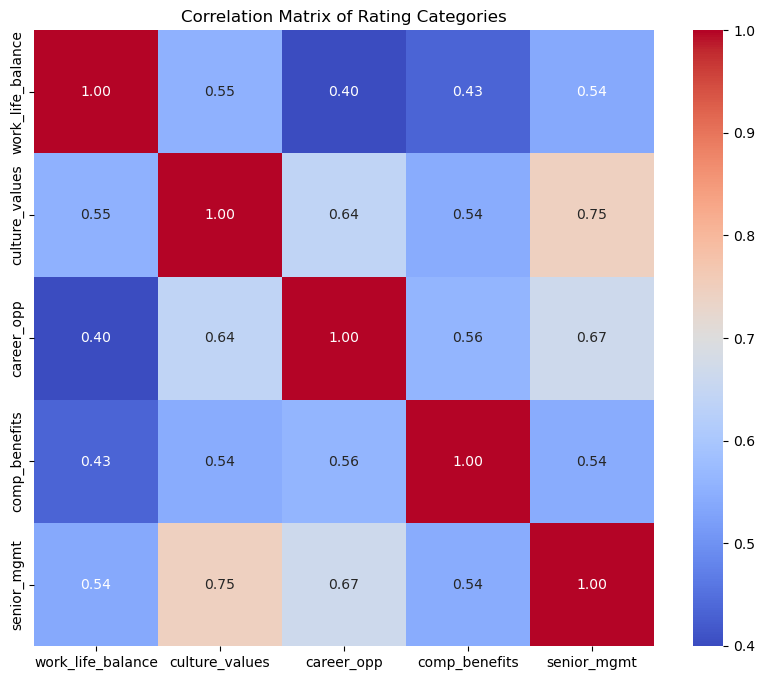

In [53]:
# Correlation Between Ratings
correlation_matrix = dataset[categories].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Rating Categories')
plt.show()

